In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

# Set Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in background
chrome_options.add_argument("--no-sandbox") # Required for Colab

driver = None # Initialize driver to None
try:
    # Start browser
    driver = webdriver.Chrome(options=chrome_options)

    # Load the page
    driver.get("https://recruitment.cdcfib.gov.ng/")

    # Wait for table to load (adjust time if slow)
    time.sleep(5)

    # Get page source after JS execution
    html = driver.page_source

    # Extract tables with pandas
    tables = pd.read_html(html)

    # Save the first table
    df = tables[0]
    df.to_excel("cdcfib_table.xlsx", index=False)

    print("Saved to cdcfib_table.xlsx")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Ensure the browser is closed
    if driver:
        driver.quit()
        print("Browser closed.")

/tmp/ipython-input-2530082953.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


Saved to cdcfib_table.xlsx
Browser closed.


In [ ]:
!pip install selenium webdriver_manager

In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 32.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("cdcfib_table.xlsx")

In [ ]:
# Reshape the DataFrame to have only 'STATE' and 'APPLICANTS' columns
df_reshaped = df.melt(
    value_vars=['STATE', 'APPLICANTS', 'STATE.1', 'APPLICANTS.1', 'STATE.2', 'APPLICANTS.2'],
    var_name='Category',
    value_name='Value'
).dropna(subset=['Value'])

# Separate the melted data back into STATE and APPLICANTS columns
df_reshaped['Type'] = df_reshaped['Category'].apply(lambda x: 'STATE' if 'STATE' in x else 'APPLICANTS')
df_reshaped['Index'] = df_reshaped.groupby('Type').cumcount()

df_final = df_reshaped.pivot(index='Index', columns='Type', values='Value').reset_index(drop=True)

# Rename columns and sort
df_final = df_final[['STATE', 'APPLICANTS']].sort_values(by='APPLICANTS', ascending=False).reset_index(drop=True)

# Convert 'APPLICANTS' to integer after handling potential non-numeric values
df_final['APPLICANTS'] = pd.to_numeric(df_final['APPLICANTS']).astype(int)

# Display the reshaped DataFrame
display(df_final)

Type,STATE,APPLICANTS
0,kogi,116378
1,kaduna,114707
2,benue,110776
3,kano,89501
4,niger,79616
5,kwara,78510
6,katsina,77008
7,nasarawa,76760
8,adamawa,68468
9,oyo,67305


# Task
Modify the code in cell 1 to merge the 'STATE' and 'APPLICANTS' columns, round the 'APPLICANTS' to whole numbers and convert to integers, and group the data by Nigerian geopolitical zones, summing the applicants for each zone.

## Define zones and states

### Subtask:
Create a dictionary mapping Nigerian states to their respective geopolitical zones.


**Reasoning**:
Create a dictionary mapping Nigerian states to their respective geopolitical zones as instructed.



In [ ]:
nigerian_geopolitical_zones = {
    'North Central': ['benue', 'kogi', 'kwara', 'nasarawa', 'niger', 'plateau', 'federal capital territory'],
    'North East': ['adamawa', 'bauchi', 'borno', 'gombe', 'taraba', 'yobe'],
    'North West': ['jigawa', 'kaduna', 'kano', 'katsina', 'kebbi', 'sokoto', 'zamfara'],
    'South East': ['abia', 'anambra', 'ebonyi', 'enugu', 'imo'],
    'South South': ['akwa-ibom', 'bayelsa', 'cross river', 'delta', 'edo', 'rivers'],
    'South West': ['ekiti', 'lagos', 'ogun', 'ondo', 'osun', 'oyo']
}

## Map states to zones

### Subtask:
Add a new column to the `df_final` DataFrame indicating the geopolitical zone for each state.


**Reasoning**:
Define a function to map states to zones and apply it to the DataFrame to create the 'Zone' column.



In [ ]:
def get_geopolitical_zone(state, zones_dict):
    """Maps a state to its geopolitical zone."""
    # Convert state name to lowercase for consistent matching
    state_lower = state.lower()
    for zone, states in zones_dict.items():
        if state_lower in states:
            return zone
    return 'Unknown' # Handle states not found in the dictionary

# Apply the function to create the new 'Zone' column
df_final['Zone'] = df_final['STATE'].apply(lambda x: get_geopolitical_zone(x, nigerian_geopolitical_zones))

# Display the DataFrame with the new 'Zone' column
display(df_final)

Type,STATE,APPLICANTS,Zone
0,kogi,116378,North Central
1,kaduna,114707,North West
2,benue,110776,North Central
3,kano,89501,North West
4,niger,79616,North Central
5,kwara,78510,North Central
6,katsina,77008,North West
7,nasarawa,76760,North Central
8,adamawa,68468,North East
9,oyo,67305,South West


## Group by zone

### Subtask:
Group the DataFrame by the new zone column and sum the 'APPLICANTS' for each zone.


**Reasoning**:
Group the DataFrame by the 'Zone' column and sum the 'APPLICANTS' for each zone, then display the result.



In [ ]:
applicants_by_zone = df_final.groupby('Zone')['APPLICANTS'].sum().reset_index()
display(applicants_by_zone)

,Zone,APPLICANTS
0,North Central,555935
1,North East,306299
2,North West,420856
3,South East,178016
4,South South,180419
5,South West,272824


## Display results

### Subtask:
Show the total number of applicants per geopolitical zone.


**Reasoning**:
Display the DataFrame showing the total number of applicants per geopolitical zone.



In [ ]:
display(applicants_by_zone)

,Zone,APPLICANTS
0,North Central,555935
1,North East,306299
2,North West,420856
3,South East,178016
4,South South,180419
5,South West,272824


## Summary:

### Data Analysis Key Findings

*   The data was successfully grouped by the Nigerian geopolitical zones.
*   The sum of applicants was calculated for each zone.
*   The total number of applicants per geopolitical zone was displayed in the `applicants_by_zone` DataFrame.

### Insights or Next Steps

*   Analyze the distribution of applicants across zones to identify regions with high or low application rates.
*   Compare these application numbers with demographic or educational data for each zone to understand potential influencing factors.


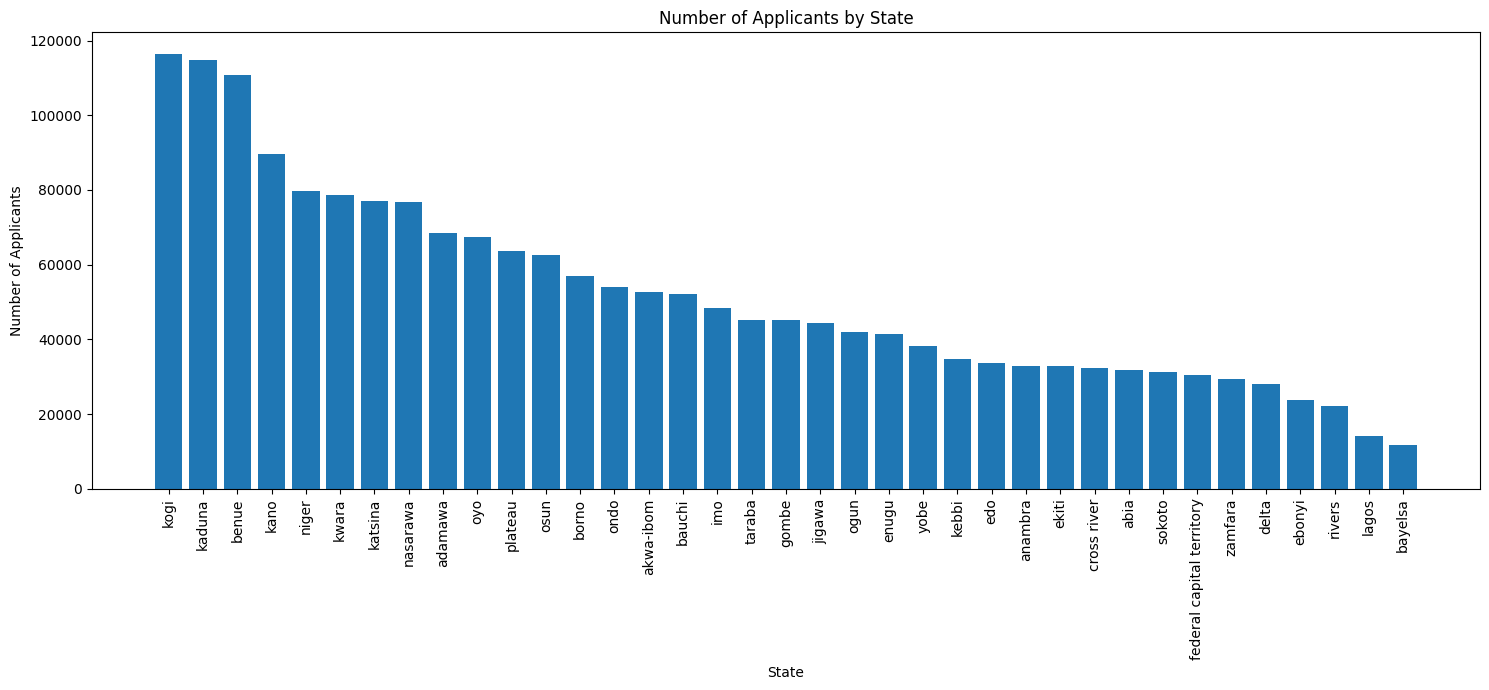

In [ ]:
# Create a bar chart to visualize the number of applicants in each state
plt.figure(figsize=(15, 7))
plt.bar(df_final['STATE'], df_final['APPLICANTS'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by State')
plt.tight_layout()
plt.show()

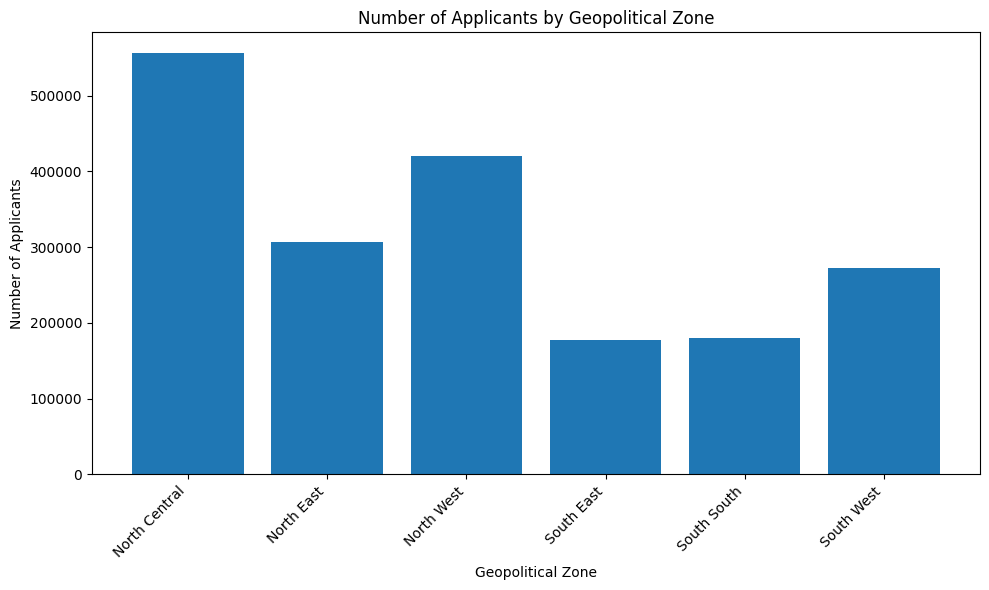

In [ ]:
# Create a bar chart to visualize the number of applicants in each zone
plt.figure(figsize=(10, 6))
plt.bar(applicants_by_zone['Zone'], applicants_by_zone['APPLICANTS'])
plt.xlabel('Geopolitical Zone')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Geopolitical Zone')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total number of applicants
total_applicants = df_final['APPLICANTS'].sum()

# Calculate the percentage of applicants for each state
df_final['Applicant_Percentage'] = (df_final['APPLICANTS'] / total_applicants) * 100

# Display the DataFrame with the new percentage column
display(df_final[['STATE', 'Applicant_Percentage']].sort_values(by='Applicant_Percentage', ascending=False))

Type,STATE,Applicant_Percentage
0,kogi,6.079247
1,kaduna,5.991959
2,benue,5.786615
3,kano,4.675271
4,niger,4.158907
5,kwara,4.101133
6,katsina,4.022673
7,nasarawa,4.009718
8,adamawa,3.576568
9,oyo,3.515817


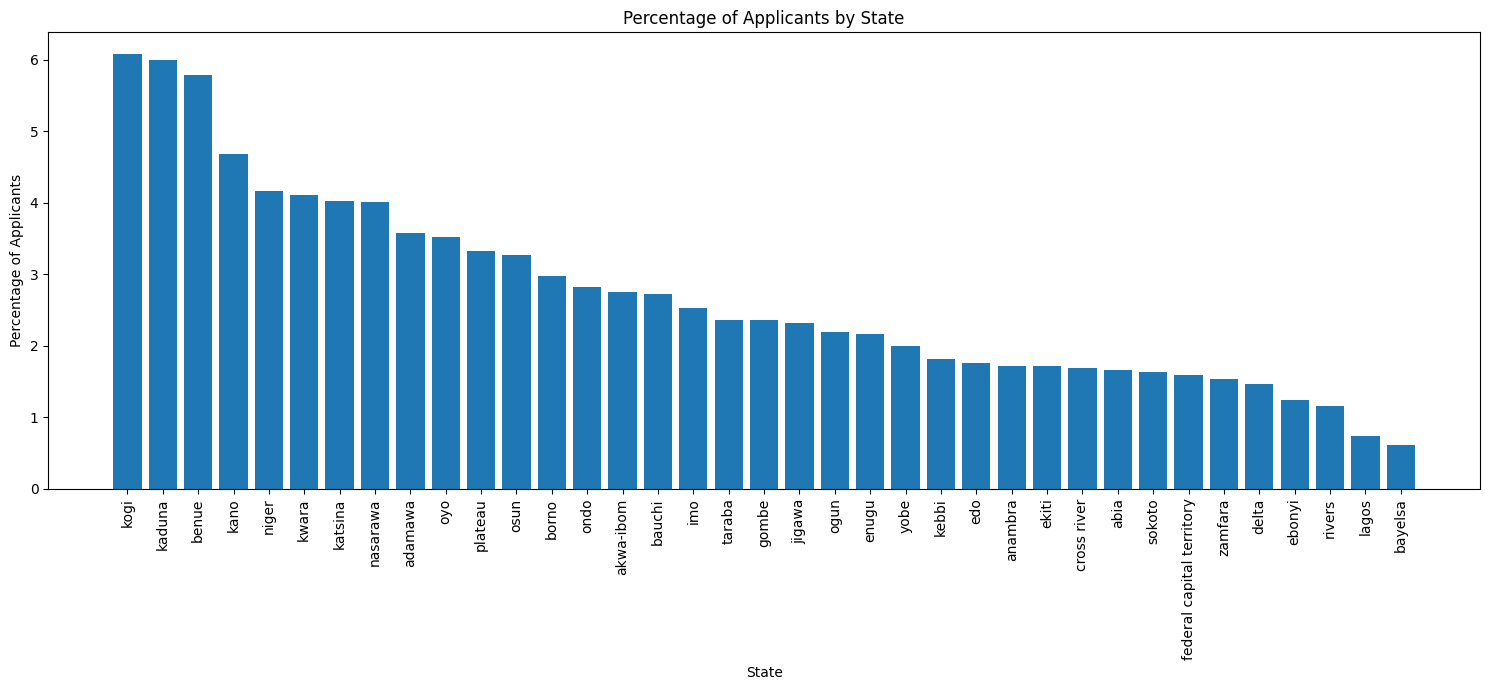

In [ ]:
# Create a bar chart to visualize the percentage of applicants in each state
plt.figure(figsize=(15, 7))
plt.bar(df_final['STATE'], df_final['Applicant_Percentage'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Applicants')
plt.title('Percentage of Applicants by State')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the percentage of applicants for each zone
applicants_by_zone['Applicant_Percentage'] = (applicants_by_zone['APPLICANTS'] / total_applicants) * 100

# Display the DataFrame with the percentage column for zones
display(applicants_by_zone.sort_values(by='Applicant_Percentage', ascending=False))

,Zone,APPLICANTS,Applicant_Percentage
0,North Central,555935,29.040421
2,North West,420856,21.984288
1,North East,306299,16.000165
5,South West,272824,14.251529
4,South South,180419,9.424562
3,South East,178016,9.299036


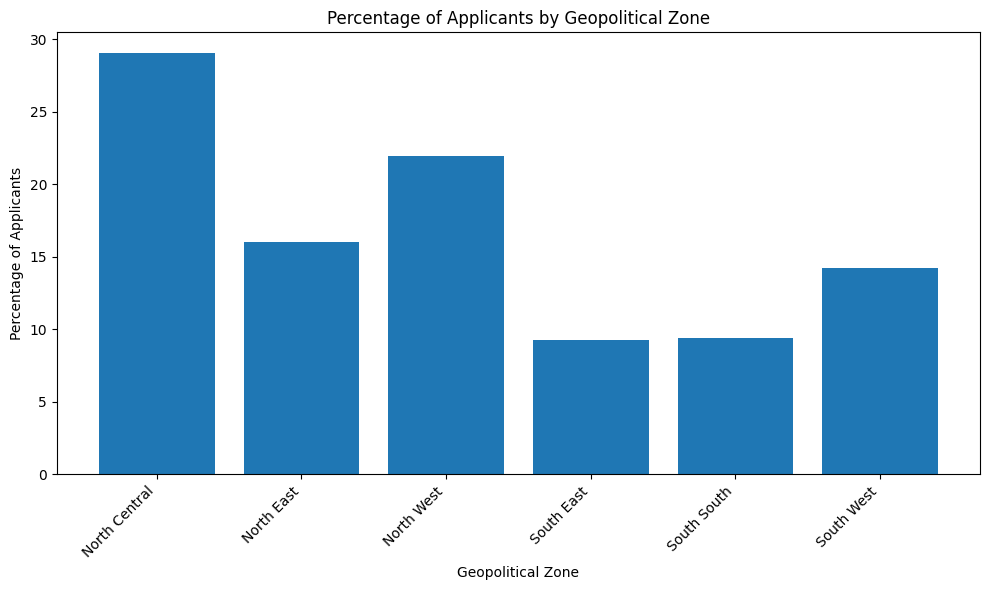

In [ ]:
# Create a bar chart to visualize the percentage of applicants in each zone
plt.figure(figsize=(10, 6))
plt.bar(applicants_by_zone['Zone'], applicants_by_zone['Applicant_Percentage'])
plt.xlabel('Geopolitical Zone')
plt.ylabel('Percentage of Applicants')
plt.title('Percentage of Applicants by Geopolitical Zone')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Load the population data from the specified Excel file into a pandas DataFrame and display its head and info to understand its structure.



In [ ]:
population_df = pd.read_excel("nigeria_states_population (1).xlsx")

In [ ]:
population_df.head()

,STATE,Population
0,kogi,5053734
1,kaduna,8324285
2,benue,6687706
3,kano,16253549
4,niger,6720617


In [ ]:
display(population_df.head())
display(population_df.info())

,STATE,Population
0,kogi,5053734
1,kaduna,8324285
2,benue,6687706
3,kano,16253549
4,niger,6720617


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE       37 non-null     object
 1   Population  37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 724.0+ bytes


None

In [ ]:
# Strip whitespace and convert state names to lowercase in both dataframes for robust merging
df_final['STATE'] = df_final['STATE'].str.strip().str.lower()
population_df['STATE'] = population_df['STATE'].str.strip().str.lower()

# Merge the applicant data (df_final) with the population data (population_df) on the 'STATE' column
merged_df = pd.merge(df_final, population_df[['STATE', 'Population']], on='STATE', how='left')

# Fill any potential NaN values in the 'Population' column after merging (in case of state name mismatches)
merged_df['Population'] = merged_df['Population'].fillna(0).astype(int)

# Display the merged DataFrame head and info to check the merge result
display(merged_df.head())
display(merged_df.info())

,STATE,APPLICANTS,Zone,Applicant_Percentage,Population
0,kogi,116378,North Central,6.079247,5053734
1,kaduna,114707,North West,5.991959,8324285
2,benue,110776,North Central,5.786615,6687706
3,kano,89501,North West,4.675271,16253549
4,niger,79616,North Central,4.158907,6720617


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   STATE                 37 non-null     object 
 1   APPLICANTS            37 non-null     int64  
 2   Zone                  37 non-null     object 
 3   Applicant_Percentage  37 non-null     float64
 4   Population            37 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ KB


None

In [ ]:
import numpy as np

# Calculate the application rate per 100,000 population
merged_df['Application_Rate_per_100k'] = (merged_df['APPLICANTS'] / merged_df['Population']) * 100000

# Replace infinite values with 0 (in case of 0 population)
merged_df['Application_Rate_per_100k'] = merged_df['Application_Rate_per_100k'].replace([np.inf, -np.inf], 0)

# Display the DataFrame with the new application rate column, sorted by rate
display(merged_df[['STATE', 'APPLICANTS', 'Population', 'Application_Rate_per_100k']].sort_values(by='Application_Rate_per_100k', ascending=False))

,STATE,APPLICANTS,Population,Application_Rate_per_100k
0,kogi,116378,5053734,2302.812139
7,nasarawa,76760,3632239,2113.297060
5,kwara,78510,4259613,1843.125185
2,benue,110776,6687706,1656.412528
11,osun,62447,4237396,1473.711685
1,kaduna,114707,8324285,1377.980211
8,adamawa,68468,5236948,1307.402709
4,niger,79616,6720617,1184.653135
10,plateau,63548,5400974,1176.602591
17,taraba,45250,4331885,1044.579900


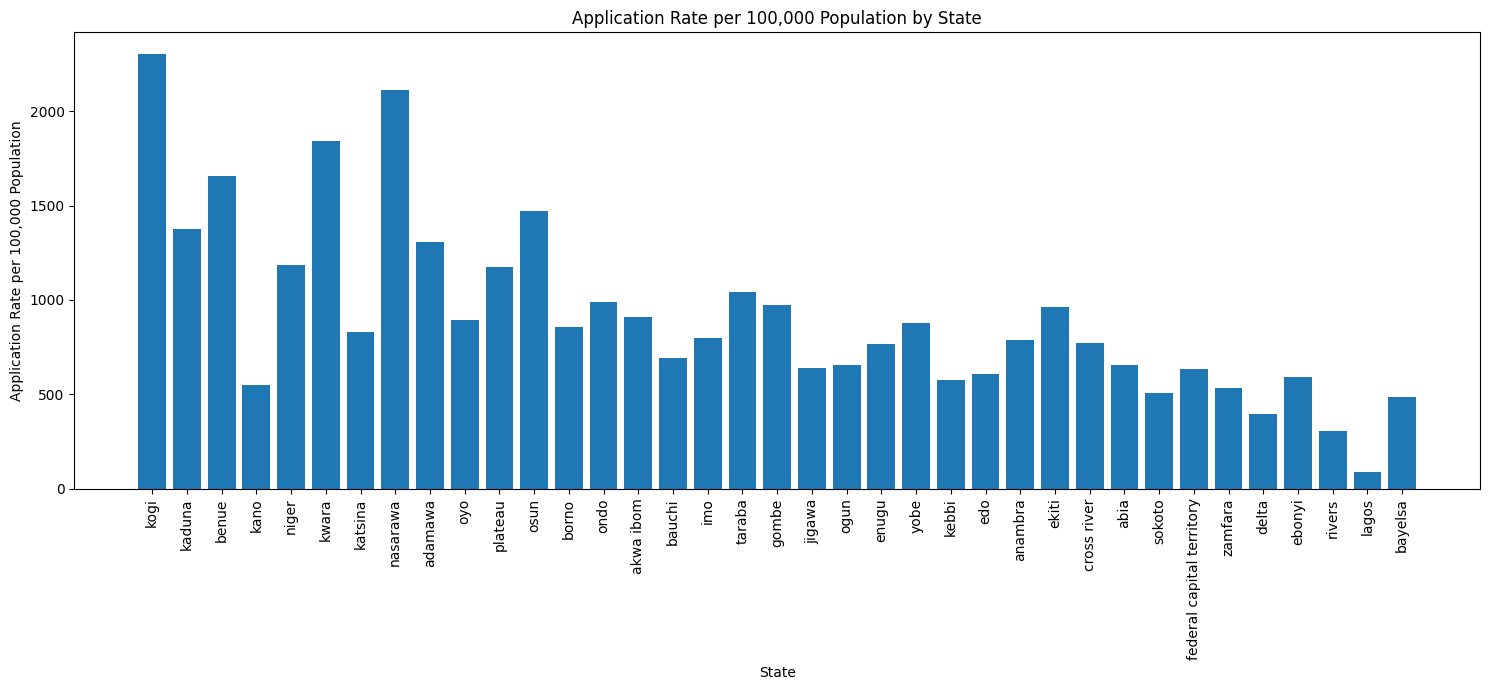

In [ ]:
# Create a bar chart to visualize the application rate per 100,000 population by state
plt.figure(figsize=(15, 7))
plt.bar(merged_df['STATE'], merged_df['Application_Rate_per_100k'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Application Rate per 100,000 Population')
plt.title('Application Rate per 100,000 Population by State')
plt.tight_layout()
plt.show()

In [ ]:
# Sort the merged_df by 'Application_Rate_per_100k' in descending order and display the top 3
top_3_states_by_intensity = merged_df.sort_values(by='Application_Rate_per_100k', ascending=False).head(3)

display(top_3_states_by_intensity[['STATE', 'APPLICANTS', 'Population', 'Application_Rate_per_100k']])

,STATE,APPLICANTS,Population,Application_Rate_per_100k
0,kogi,116378,5053734,2302.812139
7,nasarawa,76760,3632239,2113.297060
5,kwara,78510,4259613,1843.125185


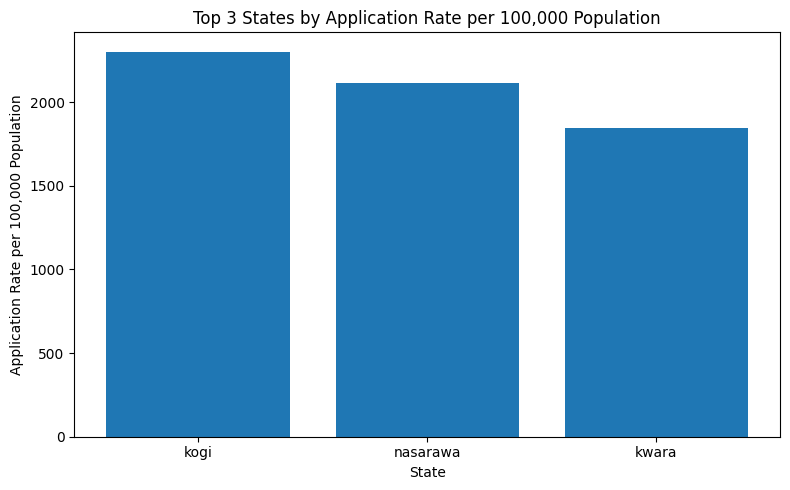

In [ ]:
# Create a bar chart to visualize the application rate per 100,000 population for the top 3 states
plt.figure(figsize=(8, 5))
plt.bar(top_3_states_by_intensity['STATE'], top_3_states_by_intensity['Application_Rate_per_100k'])
plt.xlabel('State')
plt.ylabel('Application Rate per 100,000 Population')
plt.title('Top 3 States by Application Rate per 100,000 Population')
plt.tight_layout()
plt.show()